Training ARIMA model...
Training SARIMA model...
Training LSTM model...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1920
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0256
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 16/20
25/25 ━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1133
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 16/20
25/25 ━━━━━━━━━━━━

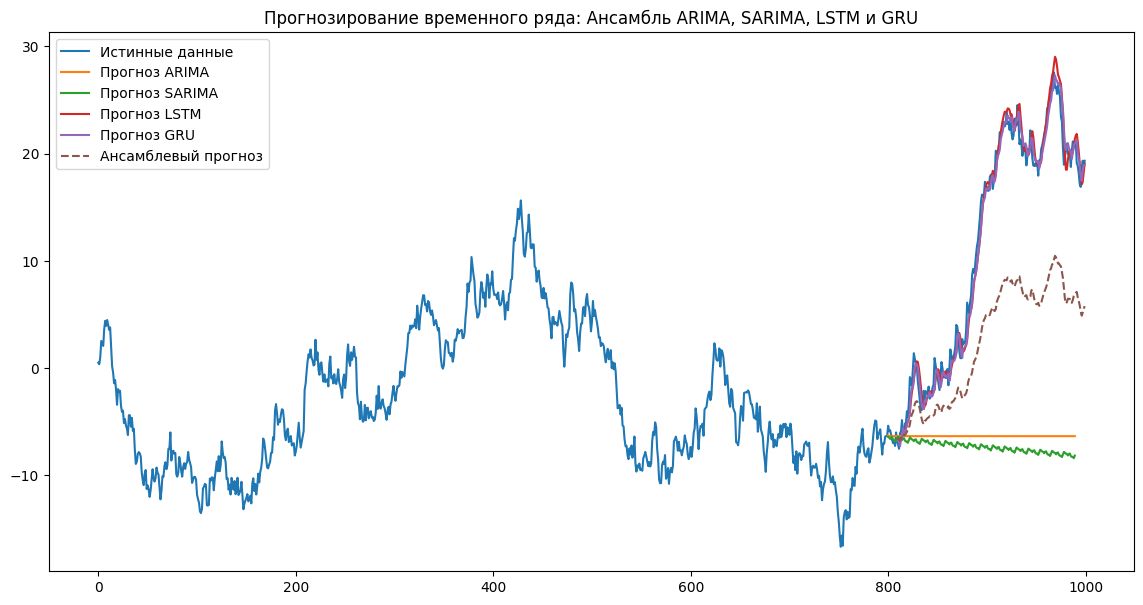

In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
import matplotlib.pyplot as plt

# Создаем искусственный временной ряд
np.random.seed(42)
time_series = np.cumsum(np.random.randn(1000))

# Разделяем данные на обучение и тест
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Масштабируем данные для моделей RNN
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# ---- ARIMA ----
print("Training ARIMA model...")
arima_model = ARIMA(train, order=(5, 1, 2))  # Параметры, полученные подбором
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))

# ---- SARIMA ----
print("Training SARIMA model...")
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Параметры, полученные подбором
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(test))

# ---- RNN Модели ----
def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X_train, y_train = create_sequences(train_scaled, window_size)
X_test, y_test = create_sequences(test_scaled, window_size)

# ---- LSTM ----
print("Training LSTM model...")
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, verbose=1)
lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# ---- GRU ----
print("Training GRU model...")
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=20, verbose=1)
gru_forecast = gru_model.predict(X_test)
gru_forecast = scaler.inverse_transform(gru_forecast)

# ---- Взвешенное усреднение ансамблевого прогноза ----
weights = {
    "arima": 0.2,
    "sarima": 0.3,
    "lstm": 0.25,
    "gru": 0.25
}

# Приведение всех прогнозов к одной длине (минимальная длина среди прогнозов)
min_length = min(len(arima_forecast), len(sarima_forecast), len(lstm_forecast), len(gru_forecast))
arima_forecast = arima_forecast[:min_length]
sarima_forecast = sarima_forecast[:min_length]
lstm_forecast = lstm_forecast.flatten()[:min_length]
gru_forecast = gru_forecast.flatten()[:min_length]

# Ансамблевый прогноз с взвешенным усреднением
ensemble_forecast = (weights["arima"] * arima_forecast +
                     weights["sarima"] * sarima_forecast +
                     weights["lstm"] * lstm_forecast +
                     weights["gru"] * gru_forecast)

# ---- Визуализация результатов ----
plt.figure(figsize=(14, 7))
plt.plot(range(len(time_series)), time_series, label='Истинные данные')
plt.plot(range(train_size, train_size + min_length), arima_forecast, label='Прогноз ARIMA')
plt.plot(range(train_size, train_size + min_length), sarima_forecast, label='Прогноз SARIMA')
plt.plot(range(train_size + window_size, train_size + window_size + min_length), lstm_forecast, label='Прогноз LSTM')
plt.plot(range(train_size + window_size, train_size + window_size + min_length), gru_forecast, label='Прогноз GRU')
plt.plot(range(train_size + window_size, train_size + window_size + min_length), ensemble_forecast, label='Ансамблевый прогноз', linestyle='--')
plt.legend()
plt.title("Прогнозирование временного ряда: Ансамбль ARIMA, SARIMA, LSTM и GRU")
plt.show()
